# Tutorial Exercises: non-parametric tests 

             
Here are some exercises on comparing groups of data (medians or means) using rank-based non-parametric tests, or permutation tests</font>


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

## 1. Whose peaches are heavier?

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/peaches.png" width=30% alt="There should be a picture of some peaches here" >


Mr Robinson’s juice factory buys peaches from farmers by the tray. Each tray contains 50 peaches. Farmer McDonald claims that this is unfair as his peaches are juicier and therefore weigh more than the peaches of his rival, Mr McGregor. 

Mr Robinson weighs eight trays of Farmer McDonald’s peaches and 8 trays of Mr McGregor’s peaches. 

Investigate whether McDonald's claim is justified by testing for a difference in weight between McDonald and McGregor's peaches using a non-parametric (rank-based) test.

a) Load the data into a Pandas dataframe

In [2]:
peaches = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/peaches.csv')
peaches

,McGregor,MacDonald
0,7.867,8.289
1,7.637,7.972
2,7.652,8.237
3,7.772,7.789
4,7.510,7.345
5,7.743,7.861
6,7.356,7.779
7,7.944,7.974


b) Plot the data and comment. 

A Kernel desity estimate plot (to show the distribution) and rug plot (to show individual data points) would be a good choice here. You should comment on the data distribution 

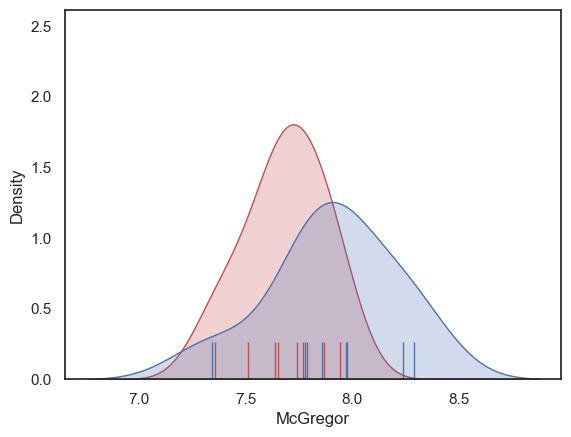

In [3]:
# your code here to plot the data
sns.kdeplot(data=peaches.McGregor, color='r', fill=True)
sns.rugplot(x=peaches.McGregor, color='r', height=0.1)
sns.kdeplot(data=peaches.MacDonald, color='b', fill=True)
sns.rugplot(x=peaches.MacDonald, color='b', height=0.1)
plt.show()

c) Conduct an appropriate rank-based non-parametric test of Farmer McDonald's claim

* State your hypotheses
* State relevant descriptive statistics
* Carry out the test using the built in function from `scipy.stats` with appropriate option choices
* State your conclusions

In [4]:
stats.mannwhitneyu(peaches.MacDonald, peaches.McGregor, alternative='greater')

MannwhitneyuResult(statistic=np.float64(50.0), pvalue=np.float64(0.032478632478632474))

d) Conduct a permutation test of the same claim

* State your hypotheses
* State relevant descriptive statistics
* Carry out the test using the built in function from `scipy.stats` with appropriate option choices
* State your conclusions

In [5]:
def dMeans(x,y):
    return np.mean(x)-np.mean(y)


stats.permutation_test((peaches.MacDonald, peaches.McGregor), dMeans, permutation_type='independent', alternative='greater')

PermutationTestResult(statistic=np.float64(0.22062500000000007), pvalue=np.float64(0.0512), null_distribution=array([ 0.103625,  0.153875, -0.049125, ..., -0.203375,  0.239625,
        0.057125], shape=(9999,)))

## 2. IQ and vitamins

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/vitamins.jpg" width=50% alt="There should be a picture of some vitamin pills here" >

The VitalVit company claim that after taking their VitalVit supplement, IQ is increased. 

They run a trial in which 22 participants complete a baseline IQ test, then take VitalVit for six weeks, then complete another IQ test.

a) What kind of design is this.

*repeated measures*

b) What are the advantages and possible disadvantages of this type of design? Should the company have done something different or additional to rule out confounding factors?

*Main disadvantage is order effects (improvement on 2nd test could simply be due to practice)
They should have counterbalanced the order or used separate groups of people*

c) Load the data into a Pandas dataframe

In [6]:
vitamin = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/vitalVit.csv')
vitamin

,ID_code,before,after
0,688870,82.596,83.437
1,723650,117.200,119.810
2,445960,85.861,83.976
3,708780,125.640,127.680
4,109960,96.751,99.103
5,968530,105.680,106.890
6,164930,142.410,145.550
7,744410,109.650,109.320
8,499380,128.210,125.110
9,290560,84.773,87.249


d) Plot the data and comment. 

A scatterplot would be a good choice as these are paired data. 
You could add the line of equality (line x=y) to the graph so we can see whether most people score higer on the IQ test before or after taking VitalVit

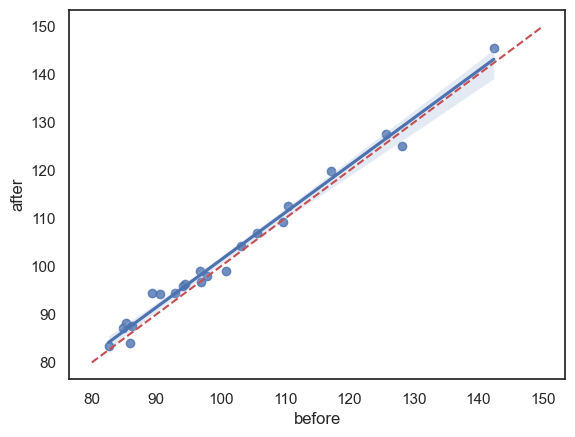

In [7]:
# Your code here for a scatter plot.
sns.regplot(data=vitamin, x='before', y='after')
plt.plot([80,150],[80,150],'r--')
plt.show()

e) Conduct a suitable rank-based non-parametric test of VitalVit's claim

* State your hypotheses
* State relevant descriptive statistics
* Carry out the test using the built in function from `scipy.stats` with appropriate option choices
* State your conclusions

In [8]:
stats.wilcoxon(vitamin.after, vitamin.before, alternative='greater')

WilcoxonResult(statistic=np.float64(208.0), pvalue=np.float64(0.003324747085571289))

f) Conduct a suitable permutation test of VitalVit's claim

* State your hypotheses
* State relevant descriptive statistics
* Carry out the test using the built in function from `scipy.stats` with appropriate option choices
* State your conclusions

In [9]:
def mDiff(x,y):
    return np.mean(x-y)

stats.permutation_test((vitamin.after, vitamin.before), mDiff, permutation_type='samples', alternative='greater')

PermutationTestResult(statistic=np.float64(1.320590909090907), pvalue=np.float64(0.0026), null_distribution=array([ 0.23077273,  0.73995455, -0.3345    , ...,  0.43895455,
        1.11986364, -0.41677273], shape=(9999,)))

## 3. Socks

In the section on permutation testing, we introduced a dataset on sock ownership (number of pairs of socks owned for 14 husband-wife couples. We noticed that when using a permutation test for difference of means, the null distribution of the difference of means was strongly affected by the presences of an outlier: 
* in one couple the husband owned about 30 more pairs of socks than the wife
* wheter the difference of means in each permutation was positive or negative depended disproportionately on whether this couple were 'flipped' or not in that particular permutation

Let's compare the use of the rank-based (Wilcoxon's Sign-Rank test) test with the permutation test for the mean difference.

**a. Load the data (done for you)**

In [10]:
socks = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/socks.csv')
socks

,Husband,Wife
0,10,12
1,17,13
2,48,20
3,28,25
4,23,18
5,16,14
6,18,13
7,34,26
8,27,22
9,22,14


**b. Plot the data (done for you)**

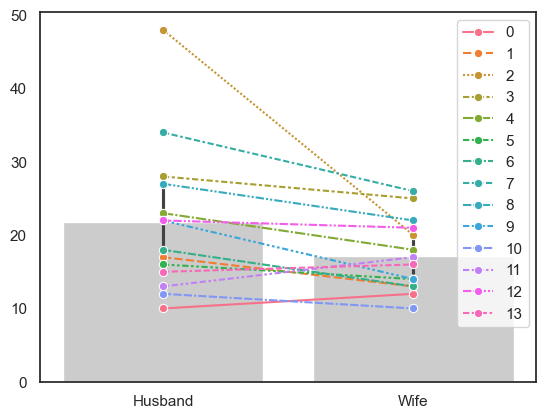

In [11]:
sns.barplot(data=socks, color=[0.8,0.8,0.8])
sns.lineplot(data=socks.T, marker='o')
plt.show()

**c. Carry out a suitable rank-based non-parametric test of the hypothesis that men own more socks than women**

In [12]:
stats.wilcoxon(socks.Husband, socks.Wife, alternative='greater')

WilcoxonResult(statistic=np.float64(92.0), pvalue=np.float64(0.006451837109273405))

**d. Carry out a suitable permutation test test of the hypothesis that men own more socks than women**

In [13]:
stats.permutation_test((socks.Husband, socks.Wife), mDiff, permutation_type='samples', alternative='greater')

PermutationTestResult(statistic=np.float64(4.571428571428571), pvalue=np.float64(0.0055), null_distribution=array([ 1.28571429,  0.28571429, -0.28571429, ..., -0.85714286,
        2.        ,  1.        ], shape=(9999,)))

**e. Compare the two tests.**

In this case the rank-based test has a (slightly) smaller $p$-value than the permutation test. 

The permutation test preserves the following features of the data:
1. In each couple one partner usually has more socks (what we shuffle is *which* partner this is)
2. One couple has an extreme difference in sock-counts (we shuffle whether it is the husband or wife who has more socks)
3. We retain the sample sizes and overall distribution of difference of means

The rank-based test 'neutralizes' one of these features, which is it and what is the effect?

*Feature 2, the outlier, is 'erased' by converting data to their ranks*